# California Housing Price 
reference : exercise in chapter 2 of 'Hands-On Machine Learning with Scikit-learn and Tensorflow' by Aurélien Géron. 

##### Tip> shortcuts for Jupyter Notebook
* Shift + Enter : run cell and select below

## 1. Data Loading

Load the data by using *read_csv()* method in __Pandas__ module. Then, let's take a look at the top 10 rows using the *head()* method. 

In [2]:
# Data load
import pandas as pd

housing = pd.read_csv('housing.csv')



In [3]:
housing.head(10)

#len(housing) #데이터 갯수

#housing.shape

#housing.columns

#housing.info()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


Let's see the distribution of the data by using __matplotlib__ module briefly.

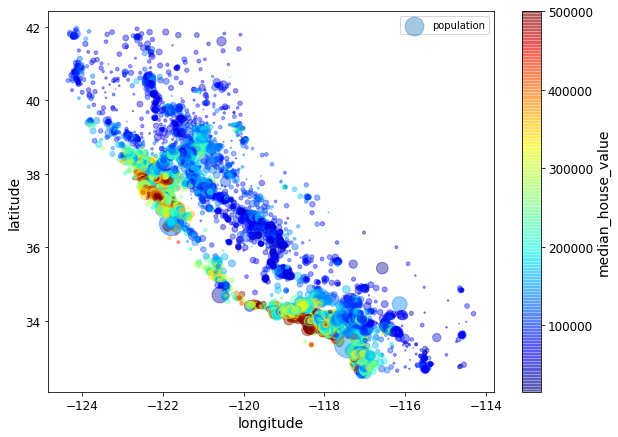

In [4]:
# figures plotting with data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/50, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

plt.legend()

데이터 분석하기

In [5]:
housing.shape #전체 데이터 조회

(20640, 10)

In [ ]:
housing.describe()

In [ ]:
%matplotlib inline 
housing.plot(kind='bar')

category_count

To better understand the characteristics of each feature, let's apply the *info()* method.

In [ ]:
# check a structure of the data
housing.info()

Let’s look at how much each attribute correlates with the *median house value*:

In [28]:
# correlation between the median_house_value and other features
corr_matrix = housing.corr()  # feature 들간의 correlation (상관도) 예측


corr_matrix['median_house_value'].sort_values(ascending=False)

#corr_matrix['median_income'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## 2. Prepare the Data

this step consists of 'pre-processing', 'train-test seperation', and 'feature-label seperation'.

### 2-1) Pre-processing 

#### 2-1.1) Data cleaning
Most Machine Learning algorithms cannot work with missing features, so let’s replace the empty values of 'total_bedrooms' with the median value.

In [31]:
# replace the empty values with the median  데이터 채우기
median =housing["total_bedrooms"].median()

print(median)
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(median)   # fillna =ㅂ=fill none 값 채우기

housing.info()

435.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### 2-1.2) Attributes combinations
*rooms_per_household* is more meaningful than *total_rooms*. Also, *bedrooms_per_room* is more meaningful than *total_bedrooms*.

In [32]:
# Attributes combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
del housing["total_rooms"], housing["total_bedrooms"]

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude              20640 non-null float64
latitude               20640 non-null float64
housing_median_age     20640 non-null float64
population             20640 non-null float64
households             20640 non-null float64
median_income          20640 non-null float64
median_house_value     20640 non-null float64
ocean_proximity        20640 non-null object
rooms_per_household    20640 non-null float64
bedrooms_per_room      20640 non-null float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### 2-1.3) Feature Scaling
Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.

__Scikit-Learn__ provides a transformer called *StandardScaler* for *standardization*.

In [33]:
# feature standardization 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# delete columns of text type and target variable
col_list = list(housing) 
col_list.remove('ocean_proximity') # text type
col_list.remove('median_house_value') # target variable needs not to be scaled

# generate a new dataframe that consist of numeric type only
housing_numeric = housing[col_list]
housing_scaled = scaler.fit_transform(housing_numeric)


# Data type conversion from 'Series' to 'DataFrame'
housing_scaled_df = pd.DataFrame(housing_scaled, index=housing_numeric.index, columns=housing_numeric.columns)

# Concatenate 
housing = pd.concat([housing_scaled_df, housing['median_house_value'], housing['ocean_proximity']], axis=1)
housing.head()

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_room,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,0.628559,-1.029988,452600.0,NEAR BAY
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,0.327041,-0.888897,358500.0,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,1.155620,-1.291686,352100.0,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,0.156966,-0.449613,341300.0,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,0.344711,-0.639087,342200.0,NEAR BAY


#### 2-1.4) Handling Text and Categorical Attributes
Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert the 'ocean_proximity' to numbers.

__Pandas__ provides a *get_dummies* method to convert integer categorical values into one-hot vectors. 

In [34]:
# One-hot encoding
housing = pd.get_dummies(housing)
housing.head(10)

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_room,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,0.628559,-1.029988,452600.0,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,0.327041,-0.888897,358500.0,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,1.155620,-1.291686,352100.0,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,0.156966,-0.449613,341300.0,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,0.344711,-0.639087,342200.0,0,0,0,1,0
5,-1.337818,1.038503,1.856182,-0.894071,-0.801787,0.087447,-0.269730,0.275563,269700.0,0,0,0,1,0
6,-1.337818,1.033821,1.856182,-0.292712,0.037823,-0.111366,-0.200918,-0.320242,299200.0,0,0,0,1,0
7,-1.337818,1.033821,1.856182,-0.237079,0.385698,-0.395137,-0.255232,0.115458,241400.0,0,0,0,1,0
8,-1.342809,1.033821,1.061601,-0.193810,0.249687,-0.942359,-0.458703,0.712372,226700.0,0,0,0,1,0
9,-1.337818,1.033821,1.856182,0.110844,0.560944,-0.094470,-0.185283,-0.223507,261100.0,0,0,0,1,0


### 2-2) Training and Test Set Seperation
__Scikit-Learn__ provides *train_test_split* function to split dataset into multiple subsets in various ways. 

In [39]:
# training - test seperation
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print('# of train_set : %.0f, # of test_set : %.0f' %(train_set.shape[0], test_set.shape[0]))

print('# of train_set : %.0f, # of test_set : %.0f' %(train_set.shape[1], test_set.shape[1]))

# of train_set : 16512, # of test_set : 4128
# of train_set : 14, # of test_set : 14


### 2-3) Features and Target Value Seperation
It’s time to prepare the data for your Machine Learning algorithms. 

Let’s separate training set into the features and target value to generate the model H(X). <br/>
Also, separate test set into the features and target value to evaluate the performance of our model H(X).

In [41]:
# feature and label seperation of training set
train_set_features = train_set.drop('median_house_value',axis=1) 
train_set_target = train_set["median_house_value"].copy()

# Feature and target value Seperation of test set
test_set_features = test_set.drop('median_house_value',axis=1)
test_set_target = test_set["median_house_value"].copy()

## 3. Linear Regression
generate the linear regression model by using *LinearRegression* function from __Scikit-learn__.

For calculating our RMSE, *mean_square_error* function will be used from __scikit-learn__. Also, __numpy__ module will be used to use sqaure-root operation.

 $$RMSE = \sqrt{\sum{(y - \widehat y)^2}\over N}$$
 <br/>
 
$y$ : actual median_house_value, $\widehat y$ : median_house_value predicted. $N$ : total number of data<br/>

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np # for a sqaure root calcuation

# generate model by using training set
lin_reg = LinearRegression()
lin_reg.fit(train_set_features, train_set_target) 

# RMSE of train set
train_predicted = lin_reg.predict(train_set_features)
train_mse = mean_squared_error(train_set_target, train_predicted) # ERROR 의 의미 
train_rmse = np.sqrt(train_mse)
print('train_linear_RMSE : %.2f' %train_rmse)

# RMSE of test set
test_predicted = lin_reg.predict(test_set_features)
test_mse = mean_squared_error(test_set_target, test_predicted)
test_rmse = np.sqrt(test_mse)
print('test_linear_RMSE : %.2f' %test_rmse)


train_linear_RMSE : 67631.16
test_linear_RMSE : 72337.41


## 4. Ridge Regression
__scikit-learn__ provides *Ridge* function and *cross_val_score* function to calculate a cross-validation.

Best alpha : 0.800000
final_ridge_RMSE : 72343.86


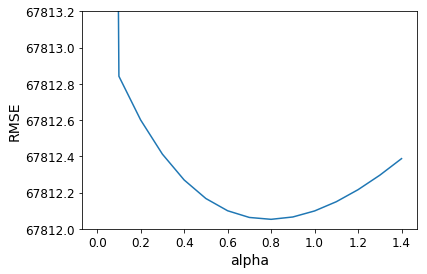

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# a function defined to calculate the RMSE with 5-fold cross-validation.
def mean_cv_rmse(model):
    rmse= np.sqrt(-cross_val_score(model, train_set_features, 
                                   train_set_target, scoring="neg_mean_squared_error", cv = 5))
    return(rmse.mean())

# find best alpha
alpha_range = np.arange(0, 1.5, 0.1)
cv_ridge = [mean_cv_rmse(Ridge(alpha = alpha_value)) for alpha_value in alpha_range]
cv_ridge = pd.Series(cv_ridge, index=alpha_range) # 값 매핑
ridge_best_alpha = cv_ridge.idxmin()
print("Best alpha : %f" % (ridge_best_alpha))

# plot the RMSE curve according to alpha value
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(alpha_range, cv_ridge)
ax1.set_ylim(67812, 67813.2)
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax1.yaxis.set_major_formatter(y_formatter)
plt.xlabel("alpha")
plt.ylabel("RMSE")

# ridge regression
model_ridge = Ridge(alpha = ridge_best_alpha)
model_ridge.fit(train_set_features, train_set_target)

# ridge RMSE
ridge_predicted = model_ridge.predict(test_set_features)
final_ridge_mse = mean_squared_error(test_set_target, ridge_predicted)
final_ridge_rmse = np.sqrt(final_ridge_mse)
print('final_ridge_RMSE : %.2f' %final_ridge_rmse)

# command to hide the warning box
import warnings
warnings.filterwarnings(action = 'ignore')

## 5. Lasso Regression

In [8]:
########### To do : fill in the box with your Lasso code. ###############

#문제 1
from sklearn.linear_model import Lasso

# Lasso regression
model_Lasso = Lasso(alpha = ridge_best_alpha)
model_Lasso.fit(train_set_features, train_set_target)

# Lasso RMSE
Lasso_predicted = model_ridge.predict(test_set_features)
final_Lasso_mse = mean_squared_error(test_set_target, ridge_predicted)
final_Lasso_rmse = np.sqrt(final_Lasso_mse)
print('final_Lasso_RMSE : %.2f' %final_Lasso_rmse)


#문제 2
# find best alpha
alpha_range = np.arange(0, 1.5, 0.1)
cv_ridge = [mean_cv_rmse(Lasso(alpha = alpha_value)) for alpha_value in alpha_range]
cv_ridge = pd.Series(cv_ridge, index=alpha_range) 
ridge_best_alpha = cv_ridge.idxmin()
print("Best alpha : %f" % (ridge_best_alpha))


#문제 3
print('final_ridge_RMSE : %.2f' %final_ridge_rmse)
print('final_Lasso_RMSE : %.2f' %final_Lasso_rmse)


Overfitting에 대한 값을 줄이기 위해서 Ridge나 Lasso를 사영하고 있지만 해당 값에 대한 OverFitting이 이루어 지지 않았기 때문에 
해당 데이터로는 값이 비슷하게 나오고 있습니다. 



SyntaxError: invalid syntax (<ipython-input-8-a33a425ee807>, line 31)